In [74]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# NLP
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence
from gensim.models import Word2Vec

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential
from keras.utils import plot_model
# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D 
from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Embedding
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply
# Deep Learning Model - Keras - LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D
# Visualization


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
books_neg = pd.read_csv("/content/drive/My Drive/LSTM/books_negative.csv")
books_pos = pd.read_csv("/content/drive/My Drive/LSTM/books_positive.csv")
dvd_neg = pd.read_csv("/content/drive/My Drive/LSTM/dvd_negative.csv")
dvd_pos = pd.read_csv("/content/drive/My Drive/LSTM/dvd_positive.csv")
ele_neg = pd.read_csv("/content/drive/My Drive/LSTM/electronics_negative.csv")
ele_pos = pd.read_csv("/content/drive/My Drive/LSTM/electronics_positive.csv")
kit_neg = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_negative.csv")
kit_pos = pd.read_csv("/content/drive/My Drive/LSTM/kitchen_positive.csv")


In [78]:
books_neg['label'] = 0 
books_pos['label'] = 1
books = pd.concat([books_neg,books_pos],axis = 0)
books['domain'] = 'books'
dvd_neg['label'] = 0
dvd_pos['label'] = 1
dvd = pd.concat([dvd_pos, dvd_neg],axis = 0)
dvd['domain'] = 'dvd'
ele_neg['label'] = 0
ele_pos['label'] = 1
ele = pd.concat([ele_neg, ele_pos],axis = 0)
ele['domain'] = 'electronics'
kit_neg['label'] = 0
kit_pos['label'] = 1
kit = pd.concat([kit_neg, kit_pos],axis = 0)
kit['domain'] = 'kitchen'
alldata = pd.concat([books,dvd,ele,kit])

In [79]:
books =books.reset_index(drop=True)
dvd =dvd.reset_index(drop=True)
ele =ele.reset_index(drop=True)
kit =kit.reset_index(drop=True)

In [80]:
x_books = books['review_text']
y_books = books['label']

x_dvd = dvd['review_text']
y_dvd = dvd['label']

x_ele = ele['review_text']
y_ele = ele['label']

x_kit = kit['review_text']
y_kit = kit['label']

In [81]:
def clean_doc(doc):
    #split into words
    tokens = word_tokenize(doc)
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    #prepare regex for char filtering
    re_punc =re.compile('[%s]'% re.escape(string.punctuation))
    #remove punctuation
    stripped =[re_punc.sub('',w) for w in tokens]
    #filter out stop words
    #stop_words = set(stopwords.words('english'))
    #words =[w for w in words if not w in stop_words]
    #remove remaining tokens that are not alphabetic
    words = [w for w in stripped if w.isalpha()]
    #filter out short tokens
    tokens = [word for word in words if len(word)>1]
    return tokens

In [82]:
text_books = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_books.append(trainx)

text_dvd = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_dvd.append(trainx)


text_ele = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_ele.append(trainx)


text_kit = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    trainx = " ".join(te)
    text_kit.append(trainx)

In [83]:
#tokens
tokens_b = []
for m in range(0,len(x_books)):
    X = ''.join(str(i)for i in x_books[m])
    te = clean_doc(X)
    tokens_b.append(te)

tokens_d = []
for m in range(0,len(x_dvd)):
    X = ''.join(str(i)for i in x_dvd[m])
    te = clean_doc(X)
    tokens_d.append(te)

tokens_e = []
for m in range(0,len(x_ele)):
    X = ''.join(str(i)for i in x_ele[m])
    te = clean_doc(X)
    tokens_e.append(te)

tokens_k = []
for m in range(0,len(x_kit)):
    X = ''.join(str(i)for i in x_kit[m])
    te = clean_doc(X)
    tokens_k.append(te)

In [84]:
#define the word2vec model
w2v_model_b = Word2Vec(tokens_b,min_count=1,size=100,workers=4)
#convert text data to vector
x_wv_b=[]
for i in range(len(tokens_b)): 
    vector=w2v_model_b.wv[tokens_b[i]]
    x_wv_b.append(vector)

In [85]:
w2v_model_d = Word2Vec(tokens_d,min_count=1,size=100,workers=4)
x_wv_d=[]
for i in range(len(tokens_d)): 
    vector=w2v_model_d.wv[tokens_d[i]]
    x_wv_d.append(vector)

In [86]:
w2v_model_e = Word2Vec(tokens_e,min_count=1,size=100,workers=4)
x_wv_e=[]
for i in range(len(tokens_e)): 
    vector=w2v_model_e.wv[tokens_e[i]]
    x_wv_e.append(vector)

In [87]:
w2v_model_k = Word2Vec(tokens_k,min_count=1,size=100,workers=4)
x_wv_k=[]
for i in range(len(tokens_k)): 
    vector=w2v_model_k.wv[tokens_k[i]]
    x_wv_k.append(vector)


In [88]:
X_wv_b=np.array(x_wv_b)
X_wv_d=np.array(x_wv_d)   
X_wv_e=np.array(x_wv_e)
X_wv_k=np.array(x_wv_k)

In [89]:
# calculate the maximum sequence length
max_words_b = len(set(" ".join(text_books).split()))
max_len_b = max([len(s.split()) for s in text_books])

max_words_d = len(set(" ".join(text_dvd).split()))
max_len_d = max([len(s.split()) for s in text_dvd])

max_words_e = len(set(" ".join(text_ele).split()))
max_len_e = max([len(s.split()) for s in text_ele])

max_words_k = len(set(" ".join(text_kit).split()))
max_len_k = max([len(s.split()) for s in text_kit])

max_words = max(max_words_b,max_words_d,max_words_e,max_words_k)
#max_len = max(max_len_b,max_len_d,max_len_e,max_len_k)


In [90]:
max_len = 120

In [91]:
# pad the vectors
X_wv_b_padded=pad_sequences(X_wv_b,  maxlen=max_len, padding='post')
X_wv_d_padded=pad_sequences(X_wv_d,  maxlen=max_len, padding='post')
X_wv_e_padded=pad_sequences(X_wv_e,  maxlen=max_len, padding='post')
X_wv_k_padded=pad_sequences(X_wv_k,  maxlen=max_len, padding='post')

In [92]:
print(X_wv_k.shape)
print(X_wv_k_padded.shape)

(2000,)
(2000, 120, 100)


In [93]:
label_encoder = LabelEncoder()
y_b = label_encoder.fit_transform(y_books)
y_b = to_categorical(y_books)
Y_b = pad_sequences(y_b,  maxlen=max_len, padding='post')
Y_b = to_categorical(Y_b)
Y_books = pad_sequences(Y_b,  maxlen=max_len, padding='post')
Y_books.shape

(2000, 120, 2)

In [94]:
label_encoder = LabelEncoder()
y_d = label_encoder.fit_transform(y_dvd)
y_d = to_categorical(y_dvd)
Y_d = pad_sequences(y_d,  maxlen=max_len, padding='post')
Y_d = to_categorical(Y_d)
Y_dvd = pad_sequences(Y_d,  maxlen=max_len, padding='post')
Y_dvd.shape

(2000, 120, 2)

In [95]:
y_e = label_encoder.fit_transform(y_ele)
y_e = to_categorical(y_ele)
Y_e = pad_sequences(y_e,  maxlen=max_len, padding='post')
Y_e = to_categorical(Y_e)
Y_ele = pad_sequences(Y_e,  maxlen=max_len, padding='post')
Y_ele.shape

(2000, 120, 2)

In [96]:
y_k = label_encoder.fit_transform(y_kit)
y_k = to_categorical(y_kit)
Y_k = pad_sequences(y_k,  maxlen=max_len, padding='post')
Y_k = to_categorical(Y_k)
Y_kit = pad_sequences(Y_k,  maxlen=max_len, padding='post')
Y_kit.shape

(2000, 120, 2)

In [97]:
#split to validation and training
X_train_b, X_valid_b = X_wv_b_padded[:1700], X_wv_b_padded[1700:]
Y_train_b, Y_valid_b = Y_books[:1700], Y_books[1700:]

In [98]:
X_train_d, X_valid_d = X_wv_d_padded[:1700], X_wv_d_padded[1700:]
Y_train_d, Y_valid_d = Y_dvd[:1700], Y_dvd[1700:]

X_train_e, X_valid_e = X_wv_e_padded[:1700], X_wv_e_padded[1700:]
Y_train_e, Y_valid_e = Y_ele[:1700], Y_ele[1700:]

X_train_k, X_valid_k = X_wv_k_padded[:1700], X_wv_k_padded[1700:]
Y_train_k, Y_valid_k = Y_kit[:1700], Y_kit[1700:]

In [99]:
print(X_train_b.shape,Y_train_b.shape)

(1700, 120, 100) (1700, 120, 2)


In [100]:
# define the LSTM model
def bi_LSTM(max_len,mode):
    model = Sequential()
    model.add(Bidirectional(LSTM(100,return_sequences=True),merge_mode=mode))
    model.add(TimeDistributed(Dense(2, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.build(input_shape=(None,120,100))
    model.summary()
    plot_model(model, to_file='bi_LSTM.png', show_shapes=True)
    return model

In [101]:
model_bi_LSTM = bi_LSTM(max_len,'ave')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 120, 100)          160800    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 120, 2)            202       
Total params: 161,002
Trainable params: 161,002
Non-trainable params: 0
_________________________________________________________________


In [102]:
# fit network_books domain
history1 = model_bi_LSTM.fit(X_train_b, Y_train_b, validation_data=(X_valid_b, Y_valid_b),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 11s 7ms/step - loss: 0.3814 - accuracy: 0.9402 - val_loss: 0.0843 - val_accuracy: 0.9917
Epoch 2/100
1700/1700 [==============================] - 11s 6ms/step - loss: 0.0450 - accuracy: 0.9917 - val_loss: 0.0351 - val_accuracy: 0.9917
Epoch 3/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.0322 - val_accuracy: 0.9917
Epoch 4/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0300 - val_accuracy: 0.9917
Epoch 5/100
1700/1700 [==============================] - 9s 5ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 6/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0268 - val_accuracy: 0.9917
Epoch 7/100
1700/1700 [==============================] - 10s 6ms/step - loss: 

In [103]:
# fit network_dvd domain
history2 = model_bi_LSTM.fit(X_train_d, Y_train_d, validation_data=(X_valid_d, Y_valid_d),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 9s 6ms/step - loss: 0.0136 - accuracy: 0.9906 - val_loss: 0.0085 - val_accuracy: 0.9998
Epoch 2/100
1700/1700 [==============================] - 9s 6ms/step - loss: 0.0130 - accuracy: 0.9904 - val_loss: 0.0098 - val_accuracy: 0.9977
Epoch 3/100
1700/1700 [==============================] - 9s 5ms/step - loss: 0.0128 - accuracy: 0.9908 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 4/100
1700/1700 [==============================] - 9s 6ms/step - loss: 0.0128 - accuracy: 0.9907 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 5/100
1700/1700 [==============================] - 9s 6ms/step - loss: 0.0127 - accuracy: 0.9907 - val_loss: 0.0097 - val_accuracy: 0.9988
Epoch 6/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0127 - accuracy: 0.9907 - val_loss: 0.0098 - val_accuracy: 0.9988
Epoch 7/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.01

In [104]:
# fit network_eletronics domain
history3 = model_bi_LSTM.fit(X_train_e, Y_train_e, validation_data=(X_valid_e, Y_valid_e),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0120 - accuracy: 0.9919 - val_loss: 0.0142 - val_accuracy: 0.9862
Epoch 2/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0116 - accuracy: 0.9927 - val_loss: 0.0143 - val_accuracy: 0.9847
Epoch 3/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9929 - val_loss: 0.0141 - val_accuracy: 0.9842
Epoch 4/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9931 - val_loss: 0.0141 - val_accuracy: 0.9847
Epoch 5/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9929 - val_loss: 0.0144 - val_accuracy: 0.9840
Epoch 6/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0113 - accuracy: 0.9931 - val_loss: 0.0144 - val_accuracy: 0.9843
Epoch 7/100
1700/1700 [==============================] - 10s 6ms/step - loss:

In [105]:
# fit network_kitchens domain
history4 = model_bi_LSTM.fit(X_train_k, Y_train_k, validation_data=(X_valid_k, Y_valid_k),batch_size=128,epochs=100)

Train on 1700 samples, validate on 300 samples
Epoch 1/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0117 - accuracy: 0.9926 - val_loss: 0.0153 - val_accuracy: 0.9853
Epoch 2/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0115 - accuracy: 0.9930 - val_loss: 0.0151 - val_accuracy: 0.9844
Epoch 3/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9931 - val_loss: 0.0143 - val_accuracy: 0.9857
Epoch 4/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9931 - val_loss: 0.0145 - val_accuracy: 0.9850
Epoch 5/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0113 - accuracy: 0.9931 - val_loss: 0.0149 - val_accuracy: 0.9847
Epoch 6/100
1700/1700 [==============================] - 10s 6ms/step - loss: 0.0113 - accuracy: 0.9932 - val_loss: 0.0148 - val_accuracy: 0.9845
Epoch 7/100
1700/1700 [==============================] - 10s 6ms/step - loss:

In [110]:
def plot_performance(history=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()

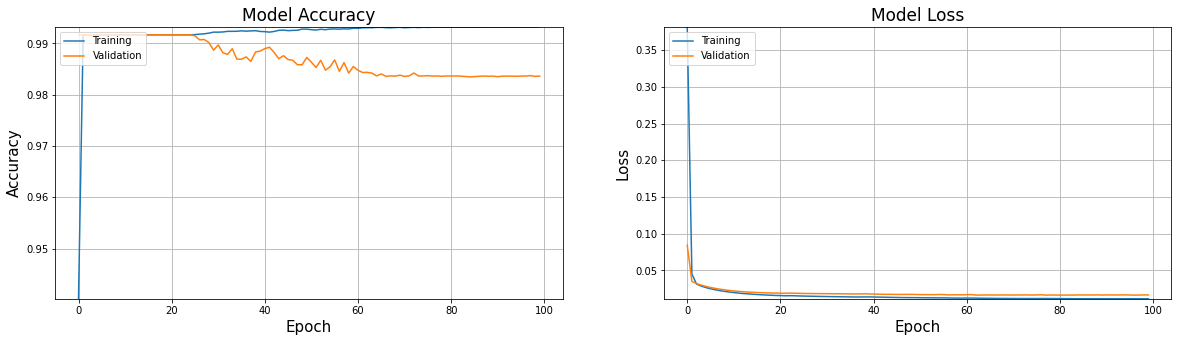

In [111]:
plot_performance(history=history1)

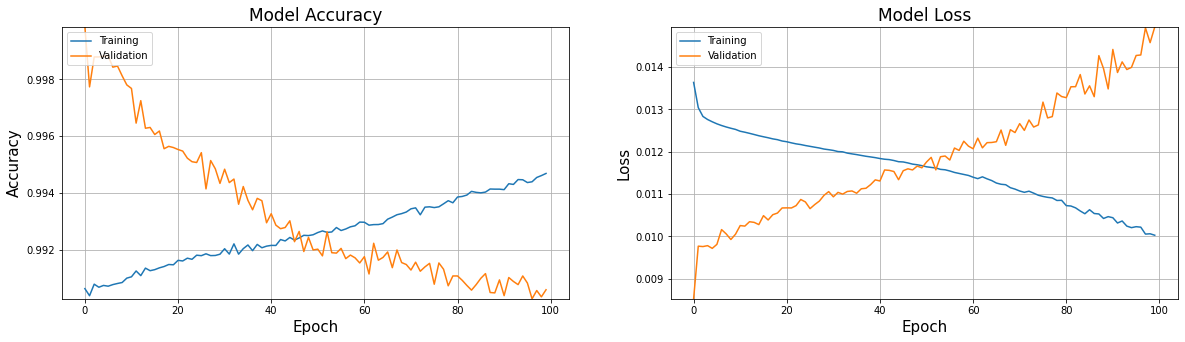

In [113]:
plot_performance(history=history2)

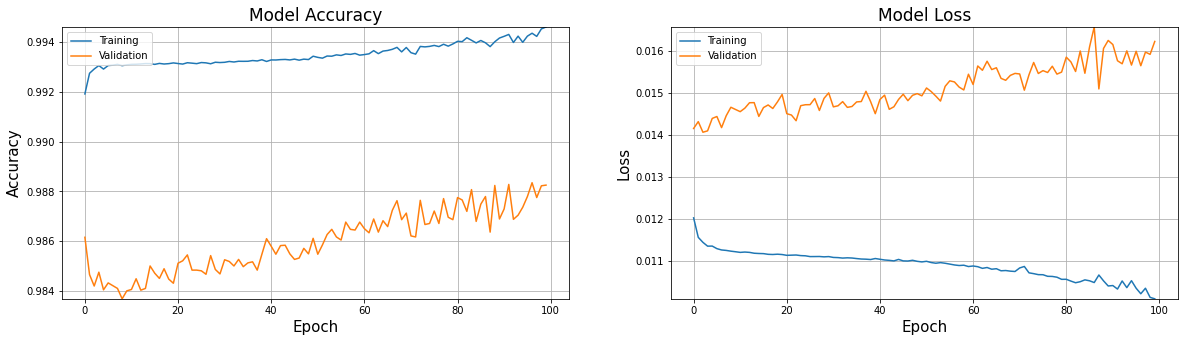

In [115]:
plot_performance(history=history3)

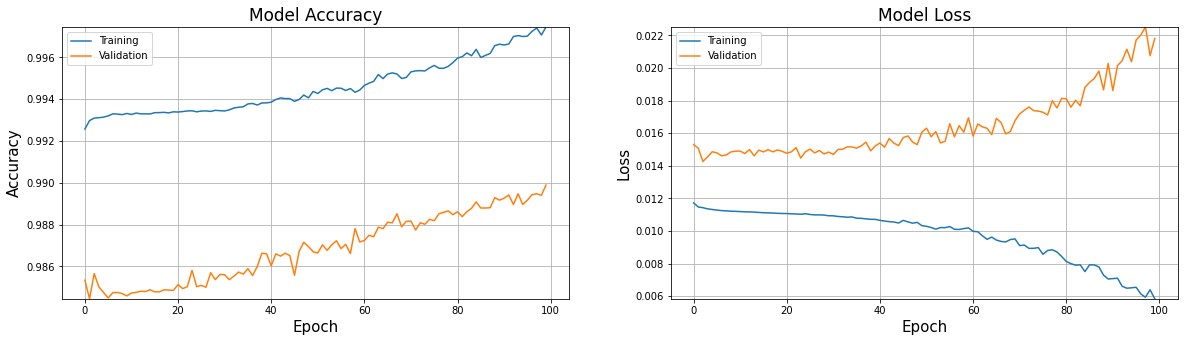

In [117]:
plot_performance(history=history4)